In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import os

In [32]:

need_columns = ['Идентификатор автора(ов)', 'Год','Цитирования','Организации','Краткое описание','Ключевые слова автора',
                'Ключевые слова указателя','Сведения о финансировании','Издатель']
df_filtered_1 = df[need_columns]

In [33]:
needed_words = ['high energy', 'quantum', 'particle physics', 'accelerator', 'collider experiments', 'hadron collider',
           'quantum field theory', 'quarks', 'higgs boson', 'standard Model', 'LHC', 'leptons', 'neutrinos', 'accelerators', 'dark matter', 'CP violation',
           'high energy physics', 'collider', 'supersymmetry', 'gluons', 'string theory', 'quantum chromodynamics (QCD)','electroweak interaction','heavy-ion collisions',
            'grand unified theory', 'cosmic rays', 'muon']

In [119]:
def contains_needed_words(row):
    # Преобразуем каждое значение в строке в строку и объединяем
    text = ' '.join(row.astype(str))
    # Проверяем на наличие хотя бы одного нужного слова
    return any(word.lower() in text for word in needed_words)
def find_organization_counts(df):
    all_organizations = []

    for organizations in df['Организации']:
        # Разделяем по ";"
        org_list = [org.strip() for org in organizations.split(';')]
        
        for org in org_list:
            # Дополнительно разделяем по "China"
            parts = org.split(', China')
            
            for i in range(len(parts)):
                part = parts[i].strip()

                # Если это не последняя часть, добавляем ", China" обратно
                if i < len(parts) - 1:
                    part += ', China'
                part = ' '.join(part.split())
                # Проверяем наличие "China" и добавляем в список
                if 'China' in part:
                    parts = org.split(',')
                    if len(parts)>4:
                        all_organizations.append(part)
    
    # Подсчитываем количество каждого уникального элемента
    organizations_counts = Counter(all_organizations)
    return organizations_counts.most_common(4)

In [182]:

df = pd.read_csv('april 4.csv')
df_filtered_1 = df[need_columns]
df_filtered_2 = df_filtered_1[df_filtered_1.apply(contains_needed_words, axis=1)].copy()
organizations_counts = find_organization_counts(df_filtered_2)
organizations_full = [org for org, count in organizations_counts] 
organizations = [org.split(',')[0] for org, count in organizations_counts]
counts = [count for org, count in organizations_counts] 


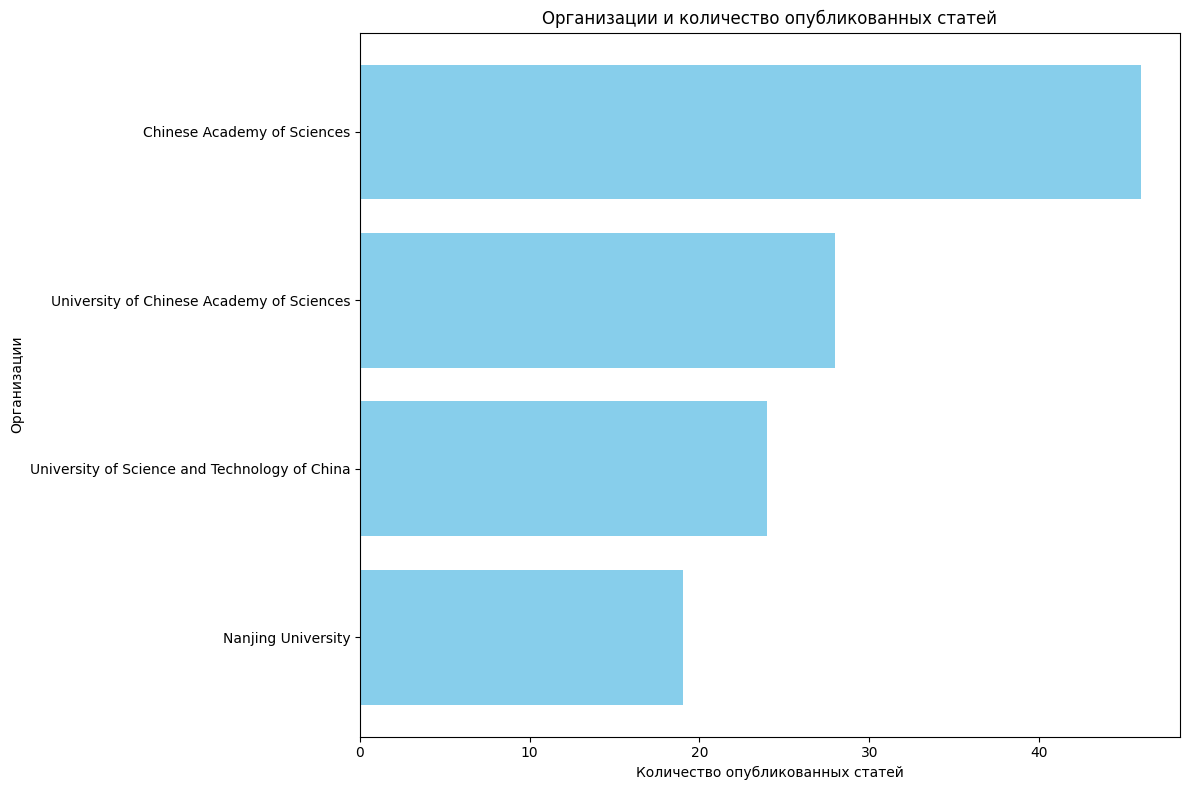

In [183]:
plt.figure(figsize=(12, 8))
plt.barh(organizations, counts, color='skyblue')
plt.xlabel('Количество опубликованных статей')
plt.ylabel('Организации')
plt.title('Организации и количество опубликованных статей')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Обрабатываем файл: april 1.csv
Обрабатываем файл: april 2.csv
Обрабатываем файл: april 3.csv
Обрабатываем файл: april 4.csv
Обрабатываем файл: aug 3.csv


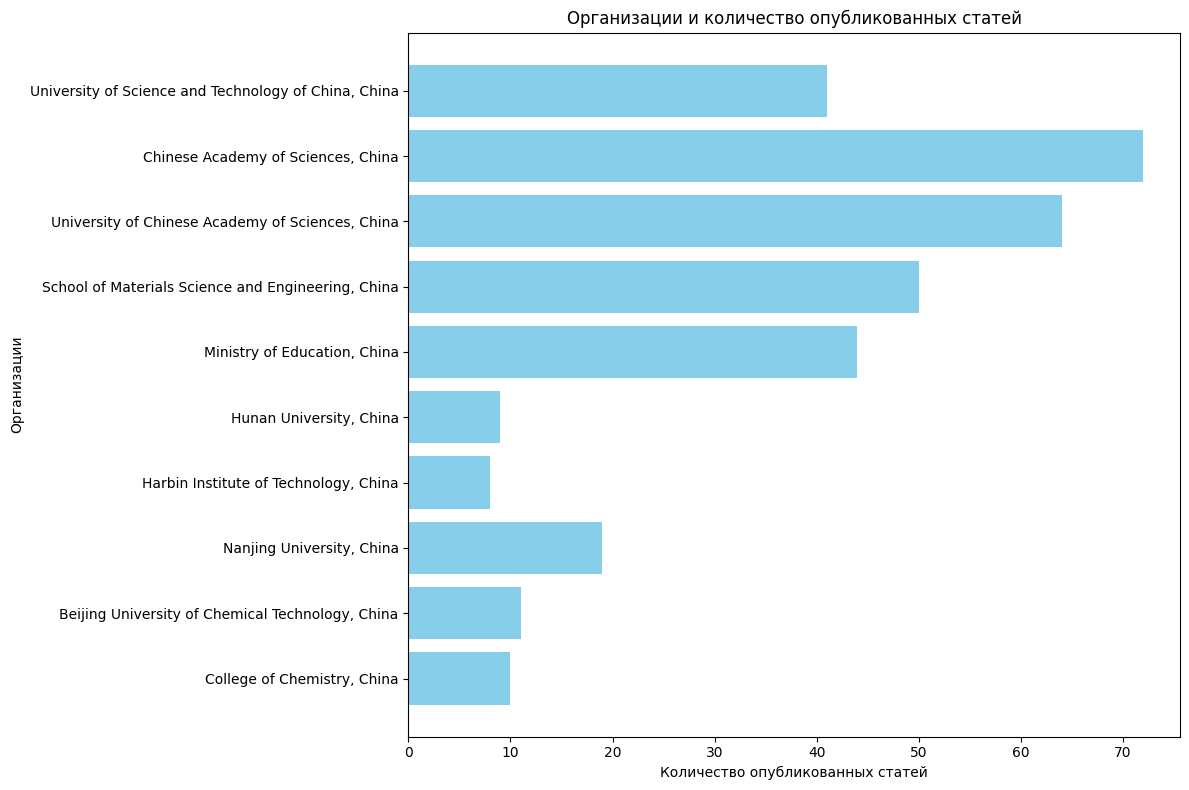

In [187]:
path = r"csv_data"

# Получение списка всех CSV файлов в папке
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Переменная для накопления полных данных
accumulated_organization_counts = {}
for csv_file in csv_files:
    file_path = os.path.join(path, csv_file)

    try:
        # Читаем CSV файл
        df = pd.read_csv(file_path, dtype=str)
        print(f'Обрабатываем файл: {csv_file}')
        
        # Фильтруем данные
        df_filtered_1 = df[need_columns]
        df_filtered_2 = df_filtered_1[df_filtered_1.apply(contains_needed_words, axis=1)].copy()
        
        # Находим количества организаций
        organizations_counts = find_organization_counts(df_filtered_2)
        
        # Накопление данных
        for org, count in organizations_counts:
            if org in accumulated_organization_counts:
                accumulated_organization_counts[org] += count
            else:
                accumulated_organization_counts[org] = count

    except Exception as e:
        print(f'Ошибка при обработке {csv_file}: {e}')

# Преобразуем накопленные данные в два списка для визуализации
organizations = list(accumulated_organization_counts.keys())
counts = list(accumulated_organization_counts.values())

# Визуализировать данные
plt.figure(figsize=(12, 8))
plt.barh(organizations, counts, color='skyblue')
plt.xlabel('Количество опубликованных статей')
plt.ylabel('Организации')
plt.title('Организации и количество опубликованных статей')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()